<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/keras_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [6]:
# adatok betöltése
!wget -q https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/machine_learning/lessons/data/weekly_death.csv
df = pd.read_csv('weekly_death.csv', parse_dates=['start', 'end'])

In [29]:
df.describe()

,year,week,start,end,man_0_34,man_35_39,man_40_44,man_45_49,man_50_54,man_55_59,...,all_50_54,all_55-59,all_60_64,all_65_69,all_70_74,all_75_79,all_80_84,all_85_89,all_90_,all_total
count,481.000000,481.000000,481,481,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,2019.108108,26.141372,2019-08-05 00:00:00.000000256,2019-08-10 23:59:59.999999744,20.609148,9.902287,18.395010,33.523909,55.334719,87.893971,...,81.022869,130.634096,221.095634,295.201663,316.124740,358.278586,400.852391,372.744283,283.569647,2582.126819
min,2015.000000,1.000000,2014-12-29 00:00:00,2015-01-04 00:00:00,7.000000,2.000000,5.000000,17.000000,34.000000,51.000000,...,51.000000,76.000000,119.000000,191.000000,195.000000,248.000000,285.000000,264.000000,188.000000,2002.000000
25%,2017.000000,13.000000,2017-04-17 00:00:00,2017-04-23 00:00:00,17.000000,7.000000,15.000000,28.000000,48.000000,77.000000,...,71.000000,113.000000,191.000000,258.000000,274.000000,315.000000,349.000000,327.000000,244.000000,2303.000000
50%,2019.000000,26.000000,2019-08-05 00:00:00,2019-08-11 00:00:00,20.000000,10.000000,18.000000,33.000000,54.000000,86.000000,...,78.000000,127.000000,221.000000,285.000000,304.000000,343.000000,385.000000,360.000000,273.000000,2479.000000
75%,2021.000000,39.000000,2021-11-22 00:00:00,2021-11-28 00:00:00,24.000000,12.000000,21.000000,37.000000,61.000000,98.000000,...,87.000000,145.000000,243.000000,317.000000,340.000000,386.000000,429.000000,401.000000,313.000000,2731.000000
max,2024.000000,53.000000,2024-03-11 00:00:00,2024-03-17 00:00:00,45.000000,23.000000,43.000000,77.000000,118.000000,152.000000,...,171.000000,227.000000,415.000000,630.000000,680.000000,699.000000,695.000000,674.000000,510.000000,4568.000000
std,2.663949,15.240597,NaN,NaN,4.908012,3.421868,5.310553,7.933313,11.738213,16.932931,...,16.327172,24.240445,42.132915,57.779708,64.669682,65.694062,72.151122,66.073090,53.349397,419.722650


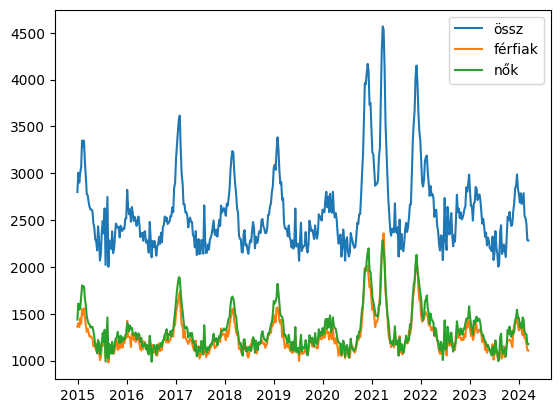

In [17]:
plt.plot(df['start'], df['all_total'], label='össz')
plt.plot(df['start'], df['man_total'], label='férfiak')
plt.plot(df['start'], df['woman_total'], label='nők')
plt.legend()

In [18]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [25]:
# define input sequence
raw_seq = df['all_total']
# choose a number of time steps
n_steps = 12
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [31]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=1)
# demonstrate prediction
#x_input = array([70, 80, 90])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

Epoch 1/1000
15/15 [==============================] - 1s 2ms/step - loss: 6044547.0000
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 1669020.7500
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 185643.8281
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 109482.0625
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 83715.6250
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 79442.8281
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 76847.5078
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 76578.5156
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 76099.5547
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 75961.4531
Epoch 11/1000
15/15 [==============================] - 0s 2ms/step - loss: 76557.8047
Epoch 12/1000
15/15 [==============================] - 0s